In [59]:
import pandas as pd

DataframeL = pd.read_csv(r"D:\Pythun projexx\Salaries\LiverpoolSalary.csv", thousands=',') #Excel adding commas by itself
print(DataframeL)
DataframeS = pd.read_csv(r"D:\Pythun projexx\Salaries\SouthamptonSalary.csv", thousands=',')
print(DataframeS)

    Rank                  Player  Annual Salary
0      1           Mohamed Salah       18200000
1      2         Virgil van Dijk       11440000
2      3  Trent Alexander-Arnold        9360000
3      4        Andrew Robertson        8320000
4      5         Federico Chiesa        7800000
5      6        Ryan Gravenberch        7800000
6      7     Alexis Mac Allister        7800000
7      8          Alisson Becker        7800000
8      9              Diogo Jota        7280000
9     10            Darwin Núñez        7280000
10    11              Cody Gakpo        6240000
11    12      Dominik Szoboszlai        6240000
12    13               Joe Gomez        4420000
13    14   Konstantinos Tsimikas        3900000
14    15         Ibrahima Konate        3640000
15    16      Nathaniel Phillips        3380000
16    17               Luis Díaz        2860000
17    18             Wataru Endo        2600000
18    19         Stefan Bajcetic        2080000
19    20          Harvey Elliott        

In [71]:
Liverpool_salaries = DataframeL["Annual Salary"].astype(float) #float so it detects as numbers
print(liverpool_salaries)
Southampton_salaries = DataframeS["Annual Salary (GBP)"].astype(float)
print(Southampton_salaries)

0     18200000.0
1     11440000.0
2      9360000.0
3      8320000.0
4      7800000.0
5      7800000.0
6      7800000.0
7      7800000.0
8      7280000.0
9      7280000.0
10     6240000.0
11     6240000.0
12     4420000.0
13     3900000.0
14     3640000.0
15     3380000.0
16     2860000.0
17     2600000.0
18     2080000.0
19     2080000.0
20     1560000.0
Name: Annual Salary, dtype: float64
0     4784000.0
1     3952000.0
2     3328000.0
3     3120000.0
4     2704000.0
5     2652000.0
6     2600000.0
7     2340000.0
8     2288000.0
9     2132000.0
10    1976000.0
11    1924000.0
12    1872000.0
13    1872000.0
14    1872000.0
15    1768000.0
16    1716000.0
17    1560000.0
18    1560000.0
19    1508000.0
20    1508000.0
Name: Annual Salary (GBP), dtype: float64


In [79]:
import numpy as np
#have to convert pd dataframe to np dataframe or it wont work
#also dont forget to transpose it
Liverpool_array = Liverpool_salaries.to_numpy()
Southampton_array = Southampton_salaries.to_numpy()

In [81]:
X_salaries = np.array([Liverpool_array, Southampton_array]).T

In [83]:
print(X_salaries)

[[18200000.  4784000.]
 [11440000.  3952000.]
 [ 9360000.  3328000.]
 [ 8320000.  3120000.]
 [ 7800000.  2704000.]
 [ 7800000.  2652000.]
 [ 7800000.  2600000.]
 [ 7800000.  2340000.]
 [ 7280000.  2288000.]
 [ 7280000.  2132000.]
 [ 6240000.  1976000.]
 [ 6240000.  1924000.]
 [ 4420000.  1872000.]
 [ 3900000.  1872000.]
 [ 3640000.  1872000.]
 [ 3380000.  1768000.]
 [ 2860000.  1716000.]
 [ 2600000.  1560000.]
 [ 2080000.  1560000.]
 [ 2080000.  1508000.]
 [ 1560000.  1508000.]]


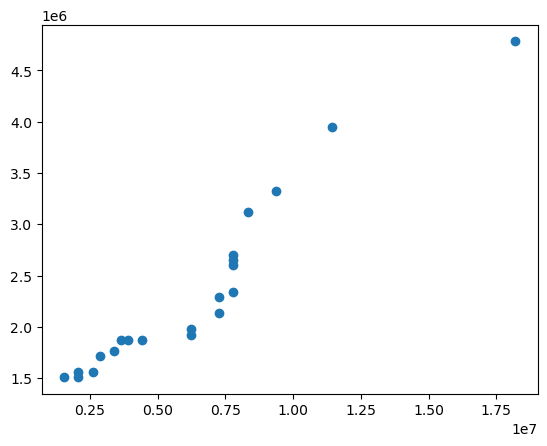

In [87]:
import matplotlib.pyplot as plt
plt.scatter(X_salaries[:,0],X_salaries[:,1])

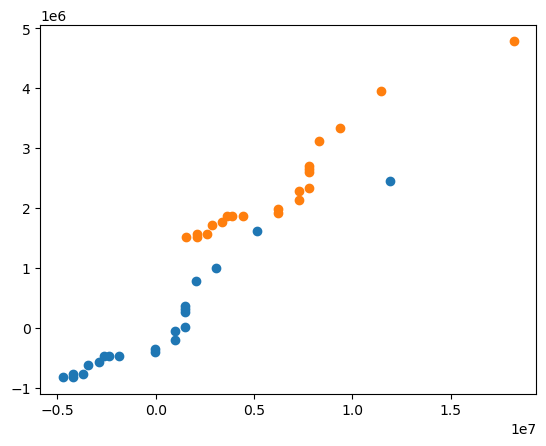

In [99]:
X_meaned=X_salaries-np.mean(X_salaries, axis=0)
plt.figure
plt.scatter(X_meaned[:,0], X_meaned[:,1])
plt.scatter(X_salaries[:,0], X_salaries[:,1])

In [101]:
C=np.cov(X_meaned, rowvar=False)
print(C)

[[1.50451848e+13 3.19300552e+12]
 [3.19300552e+12 7.38977448e+11]]


In [103]:
eval, evec=np.linalg.eig(C)
print(eval)
print(evec)

[1.57254824e+13 5.86797870e+10]
[[ 0.97804761 -0.20838157]
 [ 0.20838157  0.97804761]]


In [105]:
sorted_index=np.argsort(eval)[::-1]
sorted_eval=eval[sorted_index]
sorted_evec=evec[:,sorted_index]

In [107]:
n=1
evec_subset=sorted_evec[:,0:n]
print(evec_subset)

[[0.97804761]
 [0.20838157]]


In [119]:
X_reduced=np.dot(evec_subset.transpose(), X_meaned.transpose()).transpose()
print(X_reduced)

[[12159329.27679203]
 [ 5374353.98723857]
 [ 3209984.86556968]
 [ 2149471.9878544 ]
 [ 1554200.49963927]
 [ 1543364.65807969]
 [ 1532528.8165201 ]
 [ 1478349.60872219]
 [  958929.01142413]
 [  926421.48674539]
 [ -123255.54941031]
 [ -134091.39096989]
 [-1924973.87761413]
 [-2433558.6333526 ]
 [-2687851.01122184]
 [-2963815.07221024]
 [-3483235.66950829]
 [-3770035.57205628]
 [-4278620.32779475]
 [-4289456.16935433]
 [-4798040.92509281]]


In [121]:
#shift the data back since salary cannot have negative values

means = np.mean(X_salaries, axis=0)
X_reduced_unshifted = X_reduced + means

print("Unshifted reduced data:")
print(X_reduced_unshifted)

Unshifted reduced data:
[[18448853.08631584 14494376.89583965]
 [11663877.79676238  7709401.60628618]
 [ 9499508.67509349  5545032.4846173 ]
 [ 8438995.79737821  4484519.60690202]
 [ 7843724.30916308  3889248.11868689]
 [ 7832888.4676035   3878412.27712731]
 [ 7822052.62604391  3867576.43556772]
 [ 7767873.418246    3813397.22776981]
 [ 7248452.82094794  3293976.63047175]
 [ 7215945.2962692   3261469.105793  ]
 [ 6166268.2601135   2211792.06963731]
 [ 6155432.41855392  2200956.22807773]
 [ 4364549.93190968   410073.74143349]
 [ 3855965.17617121   -98511.01430498]
 [ 3601672.79830197  -352803.39217422]
 [ 3325708.73731357  -628767.45316262]
 [ 2806288.14001552 -1148188.05046067]
 [ 2519488.23746753 -1434987.95300866]
 [ 2010903.48172906 -1943572.70874713]
 [ 2000067.64016948 -1954408.55030671]
 [ 1491482.884431   -2462993.30604519]]


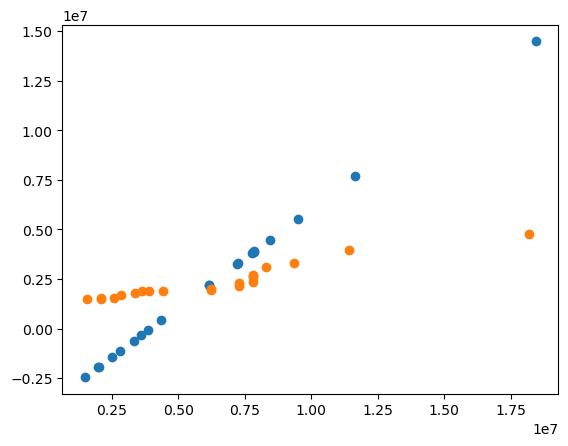

In [129]:
plt.figure()
plt.scatter(X_reduced_unshifted[:,0], X_reduced_unshifted[:,1])
plt.scatter(X_salaries[:,0], X_salaries[:,1])
plt.show()